In [1]:
# Torch
import torch
import torch.optim as optim
from torcheval.metrics import *

# Benny pointnet
from pointnet2_benny import pointnet2_cls_msg

# Custom modules
from preprocessing_post_fastsurfer.subject import *
from preprocessing_post_fastsurfer.vis import *
from ozzy_torch_utils.split_dataset import *
from ozzy_torch_utils.SubjectDataset import *
from ozzy_torch_utils.plot import *
from ozzy_torch_utils.train_nn import *
from ozzy_torch_utils.model_parameters import *
from ozzy_torch_utils.init_dataloaders import *

### Hyperparameters

In [2]:

model_parameters = ModelParameters()

model_parameters.data_path = "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/scratch-disk/full-datasets/adni1-complete-3T-processed"

model_parameters.selected_labels = ['CN', 'MCI']

# Dictionary key representing the data of interest
model_parameters.data_string = 'hcampus_pointcloud'

# Dictionary key representing the disease labels
model_parameters.labels_string = 'research_group'

# Prevent class imbalance
model_parameters.downsample_majority = True

# NB this argument makes prevent_id_leakage redundant
model_parameters.single_img_per_subject = False

# Prevent the same subject id from occuring in train and test, in case of more than one image per id
model_parameters.prevent_id_leakage = True

model_parameters.batch_size = 20

model_parameters.test_size = 0.3

model_parameters.num_epochs = 2

model_parameters.learning_rate = 0.001

model_parameters.threshold = 0.5

model_parameters.model = pointnet2_cls_msg.get_model(len(model_parameters.selected_labels), normal_channel=False)

model_parameters.criterion = pointnet2_cls_msg.get_loss()

model_parameters.optimiser = optim.Adam(
                                model_parameters.model.parameters(),
                                lr=model_parameters.learning_rate,
                                betas=(0.9, 0.999),
                                eps=1e-08,
                                weight_decay=1e-4,
                                amsgrad=True
                            )

### Dataloader creation

In [3]:
train_dataloader, test_dataloader = init_dataloaders(model_parameters)

### Training

In [4]:
metrics = train_nn(model_parameters, train_dataloader, test_dataloader)

Using cuda device
Starting epoch 1



100%|██████████| 12/12 [00:08<00:00,  1.46it/s]



Epoch 1 complete

------------------------
tensor([[42.,  0.],
        [47.,  0.]])
Training Loss:   14.6112
Validation Loss: 13.2377
Accuracy:        0.4719
F1 Score:        0.0000
Precision:       0.0000
Recall:          0.0000
------------------------


Starting epoch 2



100%|██████████| 12/12 [00:07<00:00,  1.55it/s]



Epoch 2 complete

------------------------
tensor([[24., 18.],
        [21., 26.]])
Training Loss:   13.5990
Validation Loss: 12.2003
Accuracy:        0.5618
F1 Score:        0.5714
Precision:       0.5909
Recall:          0.5532
------------------------


Training complete and model saved


### Plotting

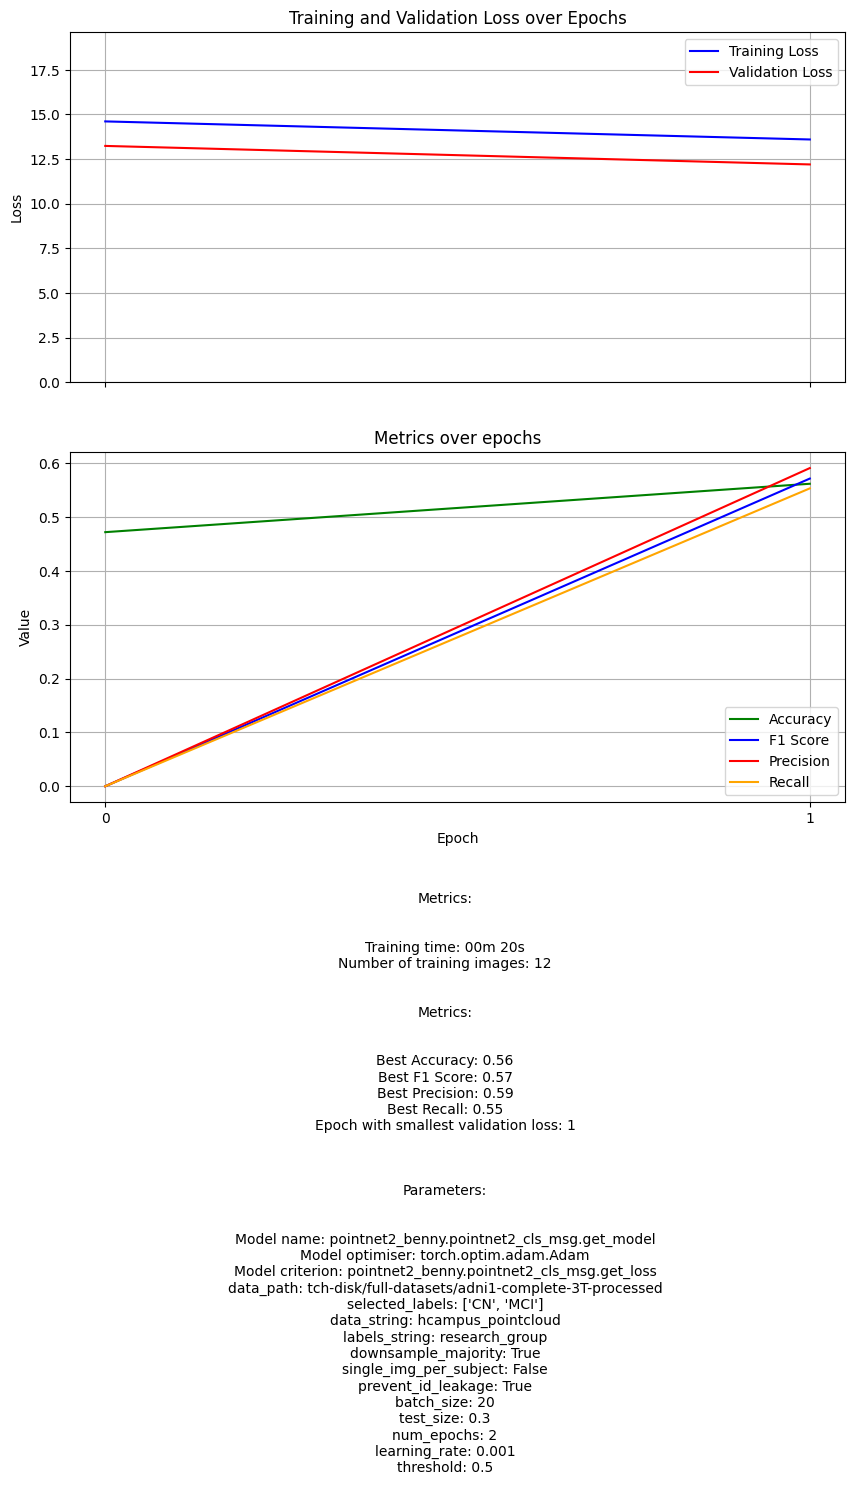

In [5]:

plot(metrics, model_parameters)
